<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/800x800-04.jpg" height="200" width="300"> 

# <center> R для тервера и матстата. <br>  <br> 1.2 Генерация распределений. </center>


Данный ноутбук является конспектом по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2017-2018). Автор ноутбука [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/R_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

---------------

Вы будете в шоке, но на самом деле R ориентирован на статитсику и всё что с ней связано! Пора бы поизучать его с этой точки зрения...  Подгружать пакеты для разных красивостей можно командой `library`. Вы должны знать об этом с первого курса...

In [1]:
library("ggplot2")  # Пакет для красивых графиков 
     
# Если вы работаете в R-studio, вы можете избежать подгрузки пакетов ниже
# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr') 
library("grid")  # Пакет для субплотов
options(repr.plot.width=4, repr.plot.height=3)

## 1. Генерим случайные величины 

Иногда для решения задач по теории вероятностей или исследования свойств статистических алгоритмов нужно сгенерировать случайную выборку из какого-нибудь распределения. Чтобы сварить в R любую случайную величину, нужно знать четыре буквы: r, d, p и q. 

Посмотрим как это работает на примере **нормального распределения**. Того самого распределения, плотность которого выглядит как-то вот так: 

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} \cdot  e^{-\frac{(x - \mu)^2}{2 \sigma^2}}
$$

* `rnorm` эта команда сгенерирует выборку из нормального распределения
* `dnorm` эта команда вычислит значение плотности в указанной точке
* `pnorm` эта команда находит вероятность 
* `qnorm` эта команда находит квантили 

Аналогично можно работать со многими другими распределениями. Нужно только загуглить названия этих распределений. Например, команда `rchisq` всё ещё генерирует выборку, но уже из распределения хи-квадрат. 

Сгенерируем случайную величину из нормального распределения с математическим ожиданием $5$ и дисперсией $9$. 

In [2]:
x <- rnorm(1000, mean=5, sd=3)  # если дисперсия 9, то стандартное отклонение 3
x[10:20]

[1]  2.351077  5.534797  6.468988  7.122550  6.851653 -1.793655  8.139293
 [8]  3.800191  7.005418  4.589615  2.538975

Мы можем посчитать какие-нибудь характеристики для нашей случайной величины! 

In [3]:
mean(x) # среднее выборочное (при больших n похоже на математическое ожидание)

[1] 4.909839

In [4]:
var(x) # выборочная дисперсия

[1] 8.877323

In [5]:
sd(x) # выборочное стандартное отклонение

[1] 2.979484

In [6]:
median(x) # выборочная медиана

[1] 4.905332

Также мы можем построить гистограмму!

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


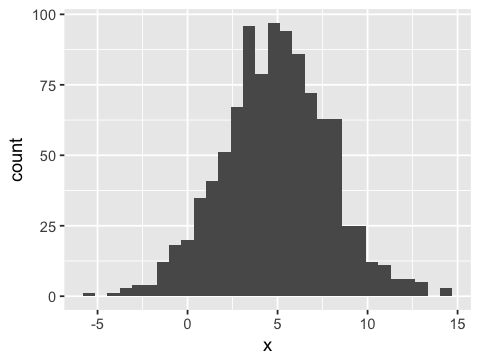

In [7]:
qplot(x) # гистограма 

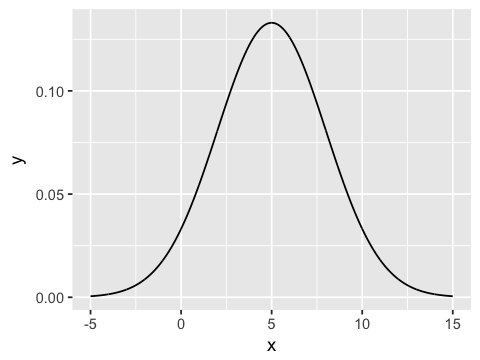

In [8]:
#построим функцию плотности
x <- seq(-5, 15, by=0.01)
y <- dnorm(x, mean=5, sd=3)
qplot(x, y, geom="line")

Найдём вероятность того, что нормально распределённая случайная величина с выбранными параметрами примет значение меньше $3$!

$$ P(X < 3) = \int_{-\infty}^3 f(x)dx = F(3)$$

In [9]:
pnorm(3, mean=5, sd=3)

[1] 0.2524925

А теперь найдём ещё одну вероятность! 

$$ P(4 < X < 9) = \int_4^9 f(x) dx = F(9) - F(4)$$

In [10]:
pnorm(9, mean=5, sd=3) - pnorm(4, mean=5, sd=3)

[1] 0.5393474

Для полноты картины осталось только найти какой-нибудь квантиль! Не будем забывать о том, что квантиль уровня $\gamma$ это такое число $q$, что 

$$P(X < q) = \gamma$$

In [11]:
qnorm(0.7, mean=5, sd=3)

[1] 6.573202

Можно использовать R как весёлый калькулятор для поиска квантелей нормального распределения при проверке гипотез!

In [12]:
x <- c(0.95, 0.975, 0.995)
qnorm(x, mean = 0, sd = 1)

[1] 1.644854 1.959964 2.575829

Рано или поздно у вас вознкнет желание набить татуху с цифрами $1.64$ и $1.96$. Давайте попробуем получить те же самые квантили, но для распределения Стьюдента! 

In [13]:
x <- c(0.95, 0.975, 0.995)
qt(x, df=10)

[1] 1.812461 2.228139 3.169273

У распределения Стьюдента обычно при проверке гипотез используется разное количество степеней свободы. Тут какие-то конкретные значения на руку уже не набьёшь. Остался один вопрос на засыпку. А что сгенерирует команда `rnorm(20)`? 

In [14]:
rnorm(20)  # конечно выборку N(0,1)

[1] -0.272094287 -0.019314071  0.456690156  1.790013884  0.343430860
 [6] -0.472894294 -0.077768911 -0.356342788  0.931511315  0.285143679
[11] -0.076007648 -1.362479233 -0.003741978  0.365087628  1.881641525
[16] -0.227227271 -0.619692671 -1.019395480  0.662659735  1.186148761

## 2. Зачем это надо? 

Чтобы решать рельные проблемы! Например, с помощью R можно оценить математическое ожидание случайной величины $\frac{1}{X}$, где $X \sim N(5; 3)$ без взятия страшных интегралов. Для этого надо лишь вспомнить [Закон Больших Чисел](https://ru.wikipedia.org/wiki/Закон_больших_чисел). Он говорит, что арифметическое среднее по большой выборке стремится по вероятности и почти наверное к математическому ожиданию. Поэтому мы просто сгенерируем большую выборку в миллион наблюдений:

In [15]:
n_obs <- 10^6
x <- rnorm(n_obs, mean = 5, sd = 3)
mean(1/x)

[1] 0.253138

Вот и наше математическое ожидание! Попробуйте ради забавы найти его на досуге вручную. Или не пробуйте. Также легко оценить многие вероятности. Например, оценим вероятность $P(X_1 + X_2 + X_3^2 > 5)$, где величины $X_i$ независимы и одинаково распределены $X_i \sim U[0;2]$:

In [16]:
n_obs <- 10^6
x_1 <- runif(n_obs, min = 0, max = 2)
x_2 <- runif(n_obs, min = 0, max = 2)
x_3 <- runif(n_obs, min = 0, max = 2)

success <- x_1 + x_2 + x_3^2 > 5
sum(success) / n_obs

[1] 0.14825

Здесь вектор success будет содержать значение `TRUE` там, где условие `x_1 + x_2 + x_3^2 > 5` выполнено, и `FALSE` там, где условие не выполнено. При сложении командой `sum()` каждое `TRUE` будет посчитано как единица, а каждое `FALSE` как ноль. Поэтому `sum(success)` даст количество раз, когда условие `x_1 + x_2 + x_3^2 > 5` выполнено.

И снова, на досуге попробуйте сделать это на бумажке своими руками, но лучше не надо. С такой же лёгкостью можно находить разные условные вероятности. Например, давайте найдём $P(X_1 + X_2 > 0.8 \mid X_3 < 0.1)$

In [17]:
uslovie <- x_3 < 0.1
uslovie[1:10]

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [18]:
# можно посмотреть сколько раз за всю симуляцию x_3 < 0.1
sum(uslovie)

[1] 49522

In [19]:
# ищем успех при условии
success <- x_1[uslovie] + x_2[uslovie] > 0.8

sum(success)/ n_obs

[1] 0.045634

## 3. Генерация выборок 

С помощью таких же нехитрых манипуляций можно симулировать различные события. Например, можно сгенерировать выборку без повторений из вектора `1:10` размера `5`. Все элементы будут выбираться равновероятно.

In [20]:
sample(1:10, size = 5)

[1] 3 8 6 9 2

Можно внести в это дело немного хаоса и сгенеровать ту же выборку, но с повторениями. 

In [21]:
sample(1:10, size = 5, replace = TRUE)

[1] 9 9 6 6 1

А ещё можно самостоятельно расставить вероятности событий. Давайте, например ссимулируем 10 подбрасываний неправильной монетки!

In [22]:
sample(c("Орёл", "Решка"), size = 10, replace = TRUE, prob = c(0.3, 0.7))

[1] "Решка" "Орёл"  "Решка" "Решка" "Орёл"  "Решка" "Орёл"  "Решка" "Орёл" 
[10] "Орёл"

А если упороться и ссимулировать огромное число наблюдений, то можно даже оценить вероятность выпадения решек. Хвала __Закону Больших Чисел__ за это!

In [23]:
x <-  sample(c("Орёл", "Решка"), size = 10^6, replace = TRUE, prob = c(0.3, 0.7))

sum(x == 'Орёл')/length(x)

[1] 0.300304

## 4. Зёрна

Если выполнить команду `rnorm(10, mean = 2, sd = 3)` на двух разных компьютерах или два раза на одном и том же, то результат будет разный. Не зря же они случайные :) Однако генерирование случайных величин никак не противоречит идее абсолютно точной воспроизводимости исследований. Для того, чтобы получились одинаковые результаты, необходимо синхронизировать генераторы случайных чисел на этих двух компьютерах. Делается это путём задания зерна генератора случайных чисел (seed). Зерно также называют стартовым значением. В качестве зерна подойдёт любое целое число.

In [24]:
set.seed(42)
rnorm(1, mean = 2, sd = 3)

[1] 6.112875

In [25]:
rnorm(1, mean = 2, sd = 3)

[1] 0.3059055

Угадайте, какие числа чаще всего используют для зёрен?

Многие алгоритмы в машинном обучении и эконометрике в какой-то степени основаны на случайности. Чтобы добиться воспроизводимых одинаковых результатов, нужно устанавливать зерно генерации. 

## 5. Дискретные  распределения

Сгенерируем каких-нибудь дискретных случайных величин и посмотрим на то как они выглядят. Заведём страшнкую функцию, которая будет строить для наших распределений гистограмму и эмпирическую функцию распределения. Эта функция выглядит страшно и вы не обязаны понимать как именно она устроена. Пока не разберётесь в пакете `ggplot2`. 

In [26]:
picture <- function(x){
    df = data.frame(sample = x)

    # Размеры картинки 
    options(repr.plot.width=8, repr.plot.height=3)

    binwidth = 1  # ширина бинов
    p1 = ggplot(df, aes(x = sample, binwidth = binwidth))+
            # Наносим гистограмму 
            geom_histogram(aes(y=..density..), binwidth = binwidth, colour = "white", 
                                               fill = "cornflowerblue", size = 0.1)
                                            # цвет линий разделителей, заливка, толщина линий разделителей

    p2 = ggplot(df, aes(x = sample, binwidth = binwidth))+
            stat_ecdf(color = "darkred", size = 1)

    # Располагаем графики рядом. Этот код нужен только для юпитерской тетрадки. 
    pushViewport(viewport(layout = grid.layout(1, 2)))
    print(p1, vp = viewport(layout.pos.row = 1, layout.pos.col = 1))
    print(p2, vp = viewport(layout.pos.row = 1, layout.pos.col = 2))
    }

Поехали! Биномиальное распределение. Обычно, если случайная величина имеет такое распределение, пишут 

$$ X \sim Bin(n,p). $$

Буквой $n$ обозначают количество испытаний, буквой $p$ вероятность успеха. 

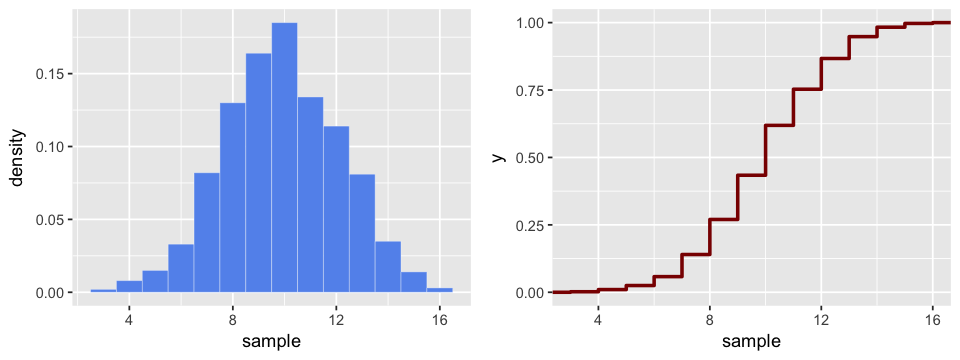

In [27]:
n = 1000

# Биномиальное распределение, Binom(size, p)
size = 20
p = 0.5
x <- rbinom(n, size = size, prob = p)

picture(x)

Распределение Пуассона! Часто используется для моделирования случайных величин- счётчиков. 

$$
X \sim Poiss(\lambda)
$$

Параметр $\lambda$ отвечает за интенсивность потока (того, что мы считаем, например, потока лайков). 



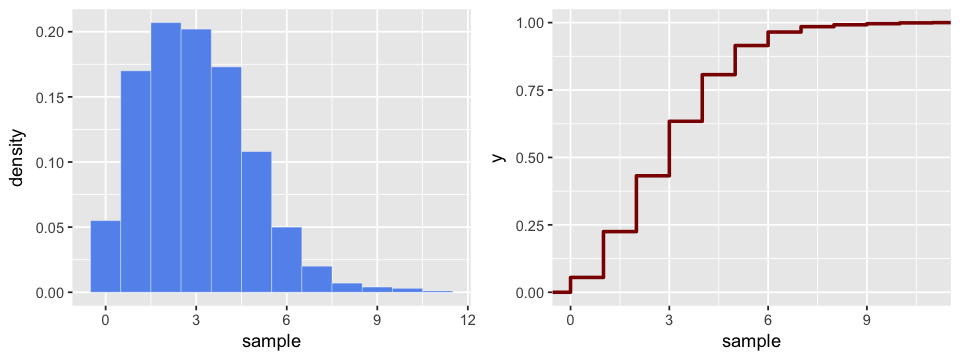

In [28]:
n = 1000

# Распределение Пуассона, Pois(lambda)
lambda = 3
x <- rpois(n, lambda = lambda)

picture(x)

Геометрическое распределение, $X \sim Geom(p)$. Моделируется, когда мы хотим понять сколько попыток уйдёт, пока мы не облажаемся в первый раз. Параметр $p$ это вероятность налажать. 

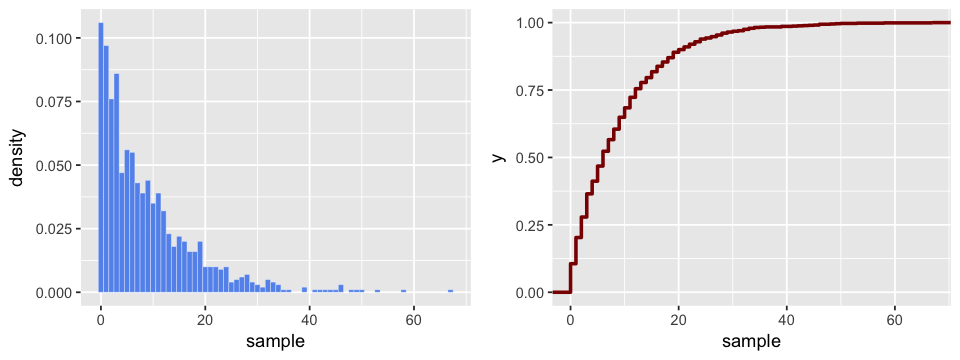

In [29]:
n = 1000

# Геометрическое распределение, Geom(p)
p = 0.1
x <- rgeom(n, prob = p)

picture(x)

Можно ссимулировать в R любое произвольное дискретное распределение. Надо только задать внутри команды `sample` соответствующие исходы и их вероятности. 

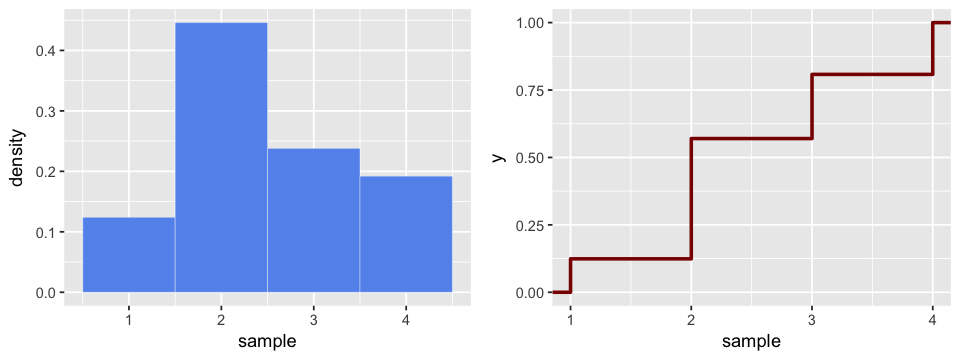

In [30]:
n = 1000


# Произвольное дискретное распределение
x <- sample(c(1,2,3,4), size = n, replace = TRUE, prob = c(0.1, 0.4, 0.2, 0.2))
picture(x)

## 6. Непрерывные распределения


Напишем такую же стрёмную функцию для непрерывных распределений. Её уж точно вы не обязаны понимать. В ней стало три аргумента. Аргументы f и fun_arg нужны, чтобы построить график настоящей плотности распределения над гистограммой. Красота требует жертв и кривого кода. 

In [31]:
picturec <- function(x, f, fun_arg){
    
    df = data.frame(sample = x)
    
    # Размеры картинки 
    options(repr.plot.width=8, repr.plot.height=3)

    binwidth = 1  # ширина бинов
    p1 = ggplot(df, aes(x = sample, binwidth = binwidth))+
            # Наносим гистограмму 
            geom_histogram(aes(y=..density..), binwidth = binwidth, colour = "white", 
                                               fill = "cornflowerblue", size = 0.1)+
                                            # цвет линий разделителей, заливка, толщина линий разделителей
    
            # Наносим плотность распределения
            stat_function(fun = f, args = fun_args, color = "darkred", size = 1)

    p2 = ggplot(df, aes(x = sample, binwidth = binwidth))+
            stat_ecdf(color = "darkred", size = 1) + 

    # Располагаем графики рядом. Этот код нужен только для юпитерской тетрадки. 
    pushViewport(viewport(layout = grid.layout(1, 2)))
    print(p1, vp = viewport(layout.pos.row = 1, layout.pos.col = 1))
    print(p2, vp = viewport(layout.pos.row = 1, layout.pos.col = 2))
    }

Будем делать выбоки чуток болше, чем для дискретных распределений. Начнём с нормального, $X \sim N(\mu, \sigma^2)$ распределения. 

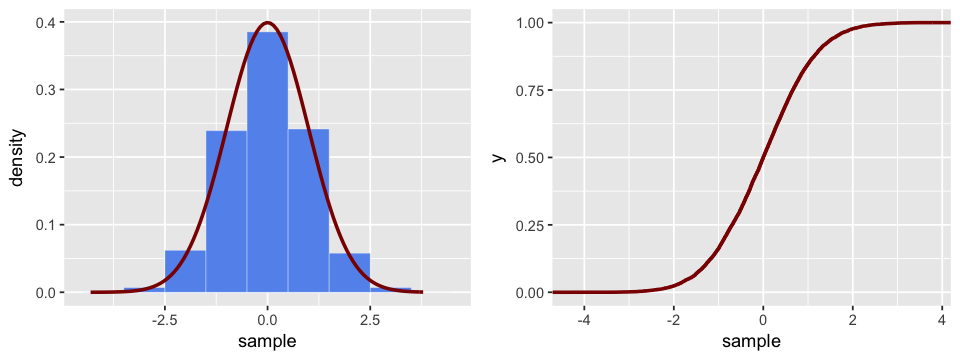

In [32]:
n = 10000

# Нормальное распределение, N(mu, sigma)
mu = 0;  sigma = 1
x <- rnorm(n, mean = mu, sd = sigma)
f <- dnorm
fun_args <- list(mean = mu, sd = sigma)

picturec(x,f,fun_args)

Экспоненциальное распределение, $X \sim Exp(\alpha)$. Обычно с помощью него моделируют время до наступления какого-то события. Например, время до поломки станка. Параметр $alpha$ отвечает за то как быстро станок сломается. Чем оно больше, тем быстрее.  

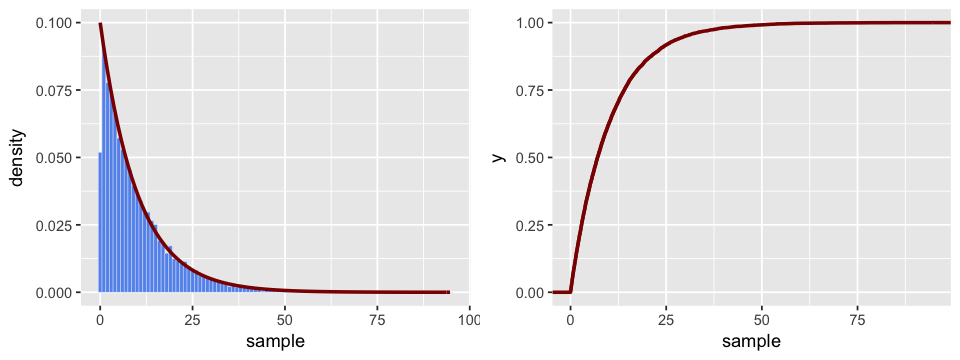

In [33]:
n = 10000

# Экспоненциальное распределение, Exp(alpha)
alpha = 0.1
x <- rexp(n, rate = alpha)
f <- dexp
fun_args <- list(rate = alpha)

picturec(x,f,fun_args)

Равномерное распределние, $X \sim [a; b]$ в представлении не нуждается! Оно выражает высшую степень нашего незнания. 

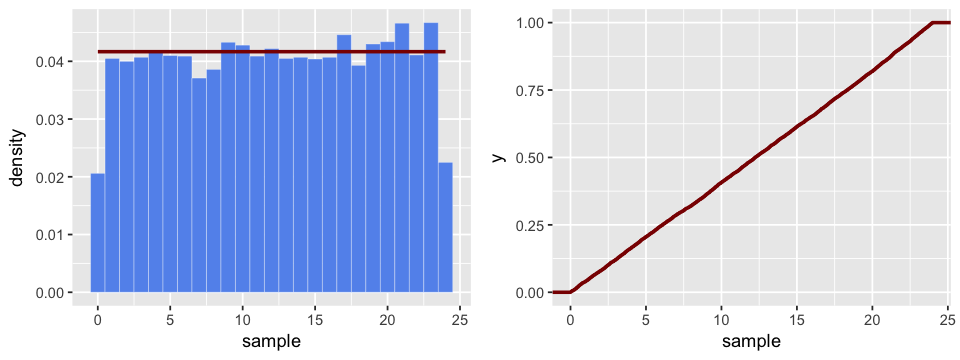

In [34]:
# Равномерное распределение, U[mn;mx]
mn=0; mx=24
x <- runif(n, min = mn, max = mx)
f <- dunif
fun_args <- list(min = mn, max = mx)

picturec(x,f,fun_args)

Ещё немного распределений, о которых мы будем говорить позже! 

In [35]:
rchisq(5, df=10)      # Хи-квадрат
rt(5, df=10)          # Стьюдента
rf(5, df1=10, df2=5)  # Фишера (F-распределение)

[1]  5.308821 14.285107  2.272586  6.402527 12.396878

[1]  2.2705771  0.1372721 -0.1225536  0.2025574  0.4843086

[1] 1.1090108 5.4838929 0.8775225 0.7268244 0.7186054

## 5. ЦПТ и равномерные величины

Давайте ещё разок вспомним ЦПТ! 

__Центральная предельная теорема в формулировке Ляпунова:__

Пусть $X_1, \ldots X_n$ случайные величины, имеющие одинаковое распределение с конечными математическим ожиданием и дисперсией. Обычно этот факт записывают вот так:

$$
X_1, \ldots X_n \sim iid(\mu,\sigma^2)
$$

тогда при $n \to \infty$ имеет место сходимость по распределению: 

$$
\frac{X_1 + \ldots X_n - \mu \cdot n}{\sqrt{n} \sigma } \Rightarrow N(0,1)
$$

На практике это означает, что при больших значениях $n$ мы можем апроксимировать распределение некоторой статистики нормальным. Возникает вопрос: __А что такое большие значения n? Когда наступает асимптотика?__ Для разных распределений  и природных явлений она наступает по-разному. Например, удивительно, сумма из равномерно-распределённых случайных величин, довольно быстро становится куполообразной. Давайте посмотрим на это.

In [36]:
n = 10^4
X1 <- runif(n, min = -1, max = 1)
X2 <- runif(n, min = -1, max = 1)
X3 <- runif(n, min = -1, max = 1)
X4 <- runif(n, min = -1, max = 1)
X5 <-runif(n, min = -1, max = 1)

In [37]:
options(repr.plot.width=4, repr.plot.height=3)

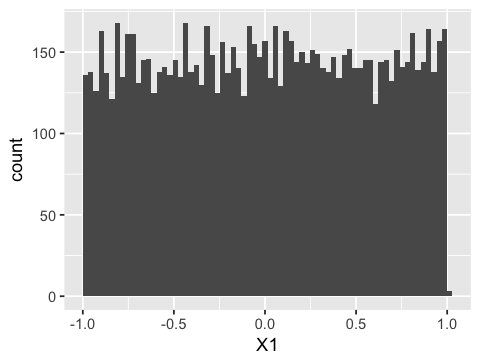

In [38]:
qplot(X1, bins = 70) # гистограма 

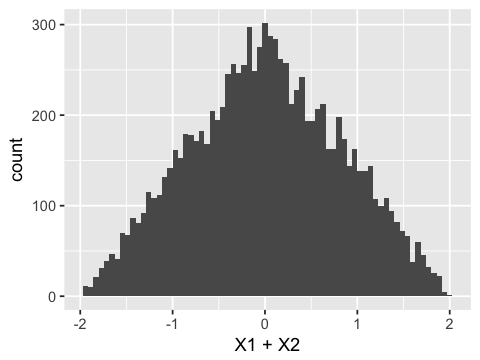

In [39]:
qplot(X1 + X2, bins = 70)

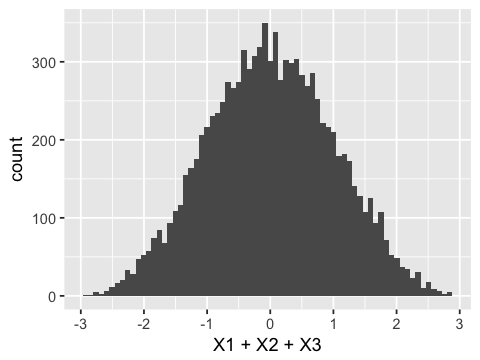

In [40]:
qplot(X1 + X2 + X3, bins = 70)

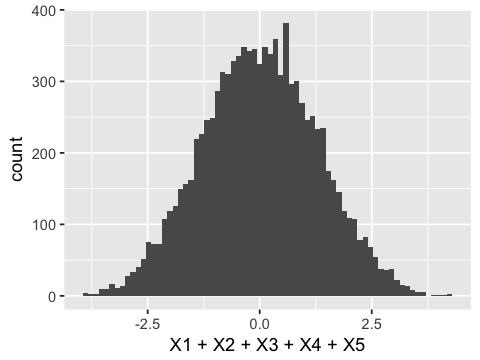

In [41]:
qplot(X1 + X2 + X3 + X4 +X5, bins = 70)

Из довольно медленно сходящихся к нормальному распределений, наверное, можно выделить логнормальное распределение. Попробуйте посмотреть на досуге на его сходимость. 

## Соблюдение авторских прав

* При написании первой части блокнота очень сильно (вплоть до копипасты) использовалась [первая глава](https://github.com/bdemeshev/r_manual_book/blob/master/03_statistics_and_more.Rmd) [учебника по языку R для начинающих от Демешева Б.Б.](https://bdemeshev.github.io/r_manual_book/)


## Почиташки 

*  Ещё один недописаный учебник с [разными распределениями и всяким таким в R](http://www.ievbras.ru/ecostat/Kiril/R/Biblio/R_rus/%C7%E0%F0%FF%E4%EE%E2%20%F7%E0%F1%F2%FC_2.pdf)
*  [Шпаргалка по ggplot2](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf)
* [15 распределений на все случаи жизни](https://habrahabr.ru/post/311092/) 
